In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import tueplots
import scienceplots
from tueplots import figsizes, fontsizes
plt.style.use(['science','no-latex'])
import numpy as np
from scipy.spatial.distance import cdist

In [81]:
def plot_variability(csv_path):
    df = pd.read_csv(csv_path)
    df_numpy = df.to_numpy()
    fhr_diff = [abs(df_numpy[i][1] - df_numpy[i+1][1]) for i in range(0,len(df_numpy),2)]
    nsa_diff = [abs(df_numpy[i][2] - df_numpy[i+1][2]) for i in range(0,len(df_numpy),2)]
    fo_diff = [abs(df_numpy[i][3] - df_numpy[i+1][3]) for i in range(0,len(df_numpy),2)]
    fhc_diff = [cdist([(df_numpy[i][4],df_numpy[i][5],df_numpy[i][6]),] , [(df_numpy[i+1][4],df_numpy[i+1][5],df_numpy[i+1][6]),]).flatten()[0] for i in range(0,len(df_numpy),2)]
    fda_diff = [np.max([abs(df_numpy[i][7]-df_numpy[i+1][7]),abs(df_numpy[i][8]-df_numpy[i+1][8]),abs(df_numpy[i][9]-df_numpy[i+1][9])]) for i in range(0,len(df_numpy),2)]
    fna_diff = [np.max([abs(df_numpy[i][10]-df_numpy[i+1][10]),abs(df_numpy[i][11]-df_numpy[i+1][11]),abs(df_numpy[i][12]-df_numpy[i+1][12])]) for i in range(0,len(df_numpy),2)]

    print(f'{np.mean(fhr_diff):.2f} +/- {np.std(fhr_diff):.2f}')
    print(f'{np.mean(nsa_diff):.2f} +/- {np.std(nsa_diff):.2f}')
    print(f'{np.mean(fo_diff):.2f} +/- {np.std(fo_diff):.2f}')
    print(f'{np.mean(fhc_diff):.2f} +/- {np.std(fhc_diff):.2f}')
    print(f'{np.mean(fda_diff):.2f} +/- {np.std(fda_diff):.2f}')
    print(f'{np.mean(fna_diff):.2f} +/- {np.std(fna_diff):.2f}')

    fig, ax = plt.subplots(1,2)
    ax[0].boxplot([fhr_diff, fhc_diff],showfliers=False)
    ax[0].set_xticks([1,2],['FHR','FHC'], )
    ax[0].set_ylabel('[mm]')
    ax[1].boxplot([nsa_diff,fda_diff,fna_diff],showfliers=False)
    ax[1].set_xticks([1,2,3],['NSA','FDA','FNA'], )
    ax[1].set_ylabel('[deg°]')
    plt.savefig('repeatability_femur.pdf')
    plt.show()


0.49 +/- 0.16
2.33 +/- 1.63
4.93 +/- 4.52
0.33 +/- 0.36
5.02 +/- 4.94
1.64 +/- 1.21


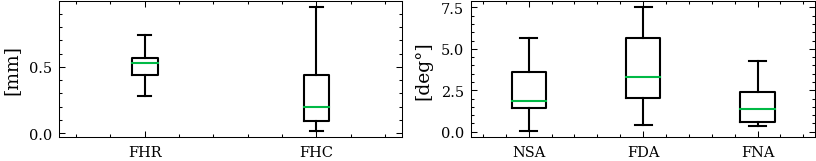

In [82]:
# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})
plt.rcParams.update(figsizes.neurips2021(nrows=1, ncols=3))
plt.rcParams.update(fontsizes.neurips2021())

plot_variability('../2D-3D-Reconstruction-Datasets/morphometry/femur_manual_cut_plane/metrics_log/femur_clinical_variability.csv')
